In [1]:
# import fingerprint_enhancer  # Load the library
import cv2
import os
import matplotlib.pyplot as plt
import random

# folder = "E:\BTP\SOCOFing\Real"
folder = "E:\BTP\SOCOFing\Test"
alt_folder = "E:\BTP\SOCOFing\AltTest"

In [2]:
SIFT_DATA = []
#   sift = cv2.xfeatures2d.SIFT_create()
sift = cv2.SIFT_create()

for filename in os.listdir(folder):
    img = cv2.imread(os.path.join(folder,filename))
#     plt.imshow(img,cmap='gray')
#     img = fingerprint_enhancer.enhance_Fingerprint(img)
    
    keypoints_1, descriptors_1 = sift.detectAndCompute(img, None)
    
    SIFT_DATA.append([filename, keypoints_1, descriptors_1])

In [3]:
num = random.randint(0, len(os.listdir(alt_folder)))
sample_filename = os.listdir(alt_folder)[num]
sample = cv2.imread(os.path.join(alt_folder,sample_filename))
# sample = fingerprint_enhancer.enhance_Fingerprint(sample)
keypoints_2, descriptors_2 = sift.detectAndCompute(sample, None)

bestscore = 0
result = None
mp = None

35.41666666666667
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Failed
0 2
 Score: 35.41666666666667


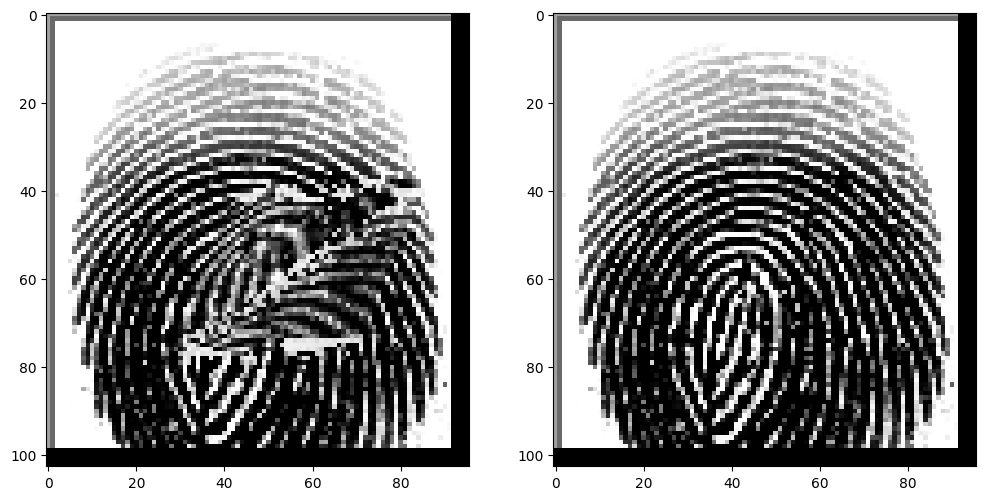

In [4]:
for i in range(len(SIFT_DATA)):

    matches = cv2.FlannBasedMatcher(dict(algorithm=1, trees=10),
                                    dict()).knnMatch(SIFT_DATA[i][2], descriptors_2, k=2)
    match_points = []
    for p, q in matches:
        if p.distance < 0.1*q.distance:
            match_points.append(p)

    keypoints = min(len(SIFT_DATA[i][1]), len(keypoints_2))
    print(len(match_points)/keypoints*100)
    if len(match_points)/keypoints*100 > bestscore:
        bestscore = len(match_points)/keypoints*100
        result, mp = i, match_points

if(result==num):
    print("Success")
else:
    print("Failed")
    
print(str(result) + " " + str(num))
print(" Score: " + str(bestscore))

img = cv2.imread(os.path.join(alt_folder, sample_filename))
out = cv2.imread(os.path.join(folder, SIFT_DATA[result][0]))
f = plt.figure(figsize=(12,6))
sp = f.add_subplot(1, 2, 1)
plt.imshow(img,cmap='gray')
sp = f.add_subplot(1, 2, 2)
plt.imshow(out,cmap='gray')